https://youtu.be/RrUTwq5jKM4?si=rtr8WFGsmKjbd3TZ

In [ ]:
#!pip install -q qiskit
#!pip install -q qiskit-ibmq-provider
#!pip install -q qiskit_ibm_provider
#!pip install -q qiskit-aer

In [ ]:
#!pip install -q pylatexenc

In [ ]:
import qiskit

In [ ]:
qiskit.__version__

'0.45.0'

In [ ]:
qiskit.__qiskit_version__

{'qiskit': '0.45.0', 'qiskit-aer': '0.13.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [ ]:
api_token = '...'

In [ ]:
from qiskit import IBMQ
IBMQ.save_account(api_token)

/tmp/ipykernel_2708/1999398629.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account(api_token)
configrc.store_credentials:WARNING:2023-11-15 22:07:14,006: Credentials already present. Set overwrite=True to overwrite.


In [ ]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
qr = qiskit.QuantumRegister(2)
qr

QuantumRegister(2, 'q1')

In [ ]:
cr = qiskit.ClassicalRegister(2)
cr

ClassicalRegister(2, 'c0')

In [ ]:
circuit = qiskit.QuantumCircuit(qr, cr)
circuit

In [ ]:
%matplotlib inline

In [ ]:
circuit.draw()

q1_0: 
      
q1_1: 
      
c0: 2/

In [ ]:
circuit.h(qr[0])

/opt/anaconda3/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


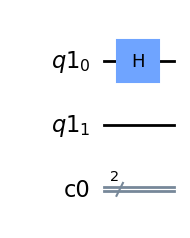

In [ ]:
circuit.draw(output='mpl')

In [ ]:
circuit.cx(qr[0], qr[1])

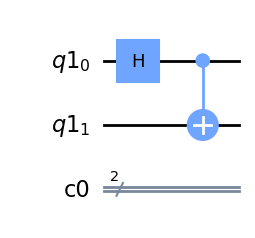

In [ ]:
circuit.draw(output='mpl')

In [ ]:
circuit.measure(qr, cr)

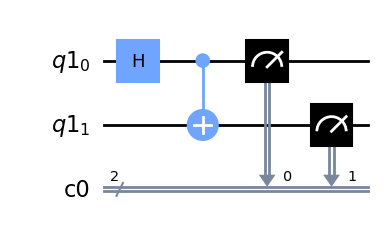

In [ ]:
circuit.draw(output='mpl')

In [ ]:
simulator = qiskit.Aer.get_backend('qasm_simulator')
simulator

QasmSimulator('qasm_simulator')

In [ ]:
job = qiskit.execute(circuit, backend=simulator)
job

In [ ]:
result = job.result()
result

Result(backend_name='qasm_simulator', backend_version='0.13.0', qobj_id='', job_id='af4c8323-fb6e-479a-b2ef-94e43c142588', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 482, '0x3': 542}), header=QobjExperimentHeader(creg_sizes=[['c0', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-158', qreg_sizes=[['q1', 2]], metadata={}), status=DONE, seed_simulator=2824213023, metadata={'time_taken': 0.008092299, 'num_bind_params': 1, 'parallel_state_update': 1, 'parallel_shots': 1, 'required_memory_mb': 1, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.000438587, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 3868, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'applied': False, 'max_fused_qubits': 5, 'threshold': 

In [ ]:
from qiskit.tools.visualization import plot_histogram

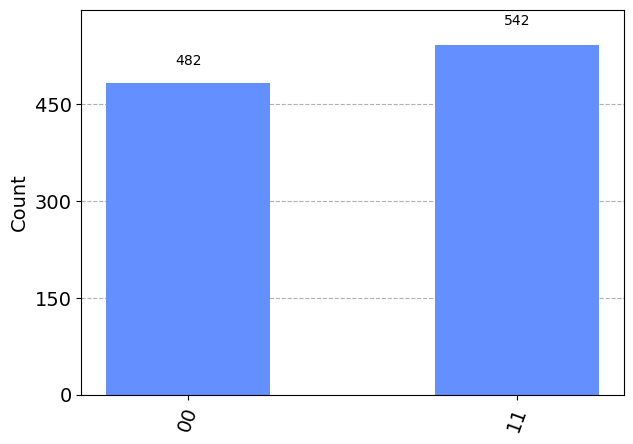

In [ ]:
plot_histogram(result.get_counts(circuit))

In [ ]:
#IBMQ.load_account()

In [ ]:
provider = IBMQ.get_provider('ibm-q')
provider

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [ ]:
qcomp = provider.get_backend('ibm_brisbane')
qcomp

<IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
job = qiskit.execute(circuit, backend=qcomp)
job

In [ ]:
from qiskit.tools.monitor import job_monitor

In [ ]:
job_monitor(job)

Job Status: job has successfully run


In [ ]:
result = job.result()
result

Result(backend_name='ibm_brisbane', backend_version='0.0.0', qobj_id='Unknown', job_id='circuit-runner_clamn0jal172ebirlthg_c0fc_0', success=True, results=[ExperimentResult(shots=4000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x2': 63, '0x3': 1918, '0x0': 1889, '0x1': 130}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], global_phase=5.497787143782138, memory_slots=2, metadata={}, n_qubits=127, name='circuit-158', qreg_sizes=[['q', 127]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5], ['q', 6], ['q', 7], ['q', 8], ['q', 9], ['q', 10], ['q', 11], ['q', 12], ['q', 13], ['q', 14], ['q', 15], ['q', 16], ['q', 17], ['q', 18], ['q', 19], ['q', 20], ['q', 21], ['q', 22], ['q', 23], ['q', 24], ['q', 25], ['q', 26], ['q', 27], ['q', 28], ['q', 29], ['q', 30], ['q', 31], ['q', 32], ['q', 33], ['q', 34], ['q', 35], ['q', 36], ['q', 37], ['q', 38], ['q', 39], ['q', 40], ['q', 41], ['q', 42], ['q', 43], ['q',

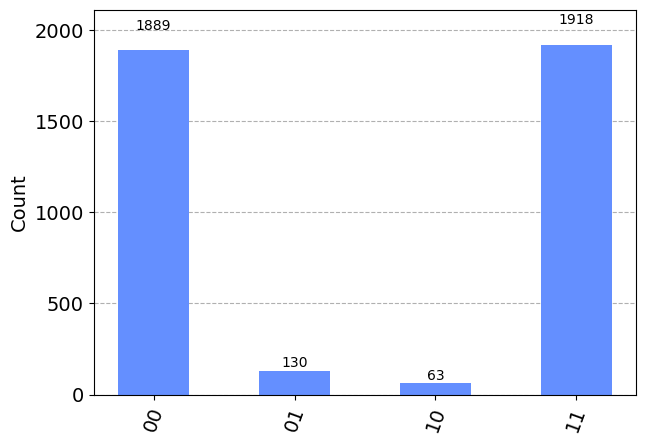

In [ ]:
plot_histogram(result.get_counts(circuit))